### 1. What is our independent variable? What is our dependent variable?

The independent and dependent variables of the experiment are: 

- Independent
  - **Word/Color** congruency
  
- Dependent
  - **Time to name ink**

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We have as starting data two samples gathered from the same test (time taken to say the name of the color a given word is printed in) applied in different conditions: one for _Congruent_ word/colors (the word and color are the same. I.e. the word "blue" printed in blue) and one for _Incongruent_ word/colors (the word is a different color than the printed color. I.e. The word "blue" is printed in red).

From the sampled data, we want to infer whether or not the time taken to say a _Congruent_ word/color is less than the time taken to say an _Incongruent_ word/color.

Having **Con** be the symbol of the _Congruent_ words and **Incon** be the symbol of the _Incongruent_ words, and **Diff** be the symbol of the _difference_ between **Con** and **Incon** (**Con** - **Incon**), we have:

**H0** (HNULL): muCon = muIncon <=> muDiff = 0

**Ha** (HALTERNATIVE): muCon != muIncon <=> muDiff != 0

HNULL hypothesis: The population mean time it takes to say the correct ink color in the _Congruent_ condition is equal to the population mean time it takes to say the correct ink color in the _Incongruent_ condition, based on the sample means.

HALTERNATIVE hypothesis: The population mean time it takes to say the correct ink color in the _Congruent_ is different than the population mean time it takes to say the correct ink color in the _Incongruent_ condition, based on the sample means.

I will be performing a two-tailed _Dependent T-Test_ because:
- The sample size is smaller than 30
- The standard deviation of the entire population is unknown
- I am measuring the results between the same test based on two different conditions on the same subject group.

I will evaluate the results based on a confidence level of 99% (T-Critical value of 2.807, for 23 degrees of freedom).

I expect to **reject** the _HNULL_ hypothesis that states that the mean time it takes to say the name of the ink colors in the _Congruent_ group will be equal to the mean time it takes to say the name of the ink colors in the _Incongruent_ group


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [132]:
import pandas as pd
import math
%pylab inline
import matplotlib.pyplot as plt
CONGRUENT = 'Congruent'
INCONGRUENT = 'Incongruent'
TCRITICAL = 2.807 # two-tailed difference with 99% Confidence and Degree of Freedom of 23

Populating the interactive namespace from numpy and matplotlib


In [155]:
path = r'~/udacity-data-analyst-nanodegree/P1/stroopdata.csv'

initialData = pd.read_csv(path)

dataDifference = [initialData[CONGRUENT][i] - initialData[INCONGRUENT][i] for i in range(0, len(initialData[CONGRUENT]))]

congruentMean = mean(initialData[CONGRUENT])
incongruentMean = mean(initialData[INCONGRUENT])
differenceMean = mean(dataDifference)

def mean(data):
    return sum(data) / len(data)

def valuesMinusMean(data):
    meanOfData = mean(data)
    return [value - meanOfData for value in data]

def valuesToPower(data, power):
    return [value ** power for value in data]

def variance(data):
    return sum(data) / (len(data) - 1)

def standardDeviation(variance):
    return math.sqrt(variance)

In [156]:
print('Mean of Congruent values:', congruentMean)
print('Mean of Incongruent values:', incongruentMean)
print('Mean of Difference values:', differenceMean)
print()
print('Range of Congruent values:', max(initialData[CONGRUENT] - min(initialData[CONGRUENT])))
print('Range of Incongruent values:', max(initialData[INCONGRUENT] - min(initialData[INCONGRUENT])))
print('Range of Difference values:', max(dataDifference - min(dataDifference)))
print()
print('Standard Deviation of Congruent values:', standardDeviation(variance(valuesToPower(valuesMinusMean(initialData[CONGRUENT]), 2))))
print('Standard Deviation of Incongruent values:', standardDeviation(variance(valuesToPower(valuesMinusMean(initialData[INCONGRUENT]), 2))))
print('Standard Deviation of Difference values:', standardDeviation(variance(valuesToPower(valuesMinusMean(dataDifference), 2))))

Mean of Congruent values: 14.051125
Mean of Incongruent values: 22.0159166667
Mean of Difference values: -7.96479166667

Range of Congruent values: 13.698
Range of Incongruent values: 19.568
Range of Difference values: 19.969

Standard Deviation of Congruent values: 3.5593579576451955
Standard Deviation of Incongruent values: 4.797057122469138
Standard Deviation of Difference values: 4.864826910359056


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

([array([ 5.,  6.,  7.,  4.,  1.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  1.,  7.,  6.,  6.,  2.,  0.,  0.,  2.])],
 array([  8.63  ,  11.2925,  13.955 ,  16.6175,  19.28  ,  21.9425,
         24.605 ,  27.2675,  29.93  ,  32.5925,  35.255 ]),
 <a list of 2 Lists of Patches objects>)

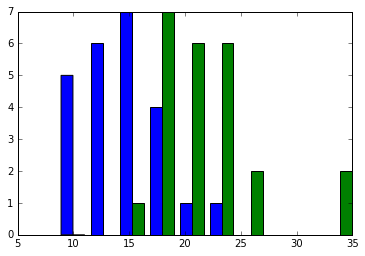

In [144]:
plt.hist(
    x=[initialData[CONGRUENT], initialData[INCONGRUENT]], 
    normed=False, 
    range=(min(initialData[CONGRUENT]), max(initialData[INCONGRUENT])),
    bins=10,
    label='Time to name'
)

(array([ 4.,  2.,  4.,  1.,  6.,  2.,  2.,  1.,  1.,  1.]),
 array([  8.63  ,   9.9998,  11.3696,  12.7394,  14.1092,  15.479 ,
         16.8488,  18.2186,  19.5884,  20.9582,  22.328 ]),
 <a list of 10 Patch objects>)

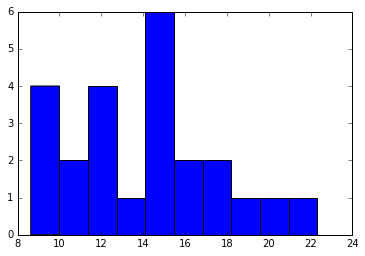

In [145]:
plt.hist(
    x=initialData[CONGRUENT],
    normed=False, 
    range=(min(initialData[CONGRUENT]), max(initialData[CONGRUENT])),
    bins=10,
    label='Time to name'
)

(array([ 4.,  4.,  6.,  3.,  4.,  1.,  0.,  0.,  0.,  2.]),
 array([ 15.687 ,  17.6438,  19.6006,  21.5574,  23.5142,  25.471 ,
         27.4278,  29.3846,  31.3414,  33.2982,  35.255 ]),
 <a list of 10 Patch objects>)

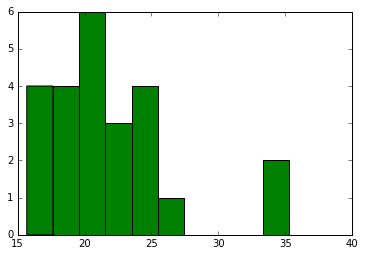

In [146]:
plt.hist(
    x=initialData[INCONGRUENT], 
    normed=False, 
    range=(min(initialData[INCONGRUENT]), max(initialData[INCONGRUENT])),
    bins=10,
    label='Time to name',
    color='Green'
)

(array([ 1.,  0.,  1.,  0.,  0.,  5.,  5.,  4.,  1.,  7.]),
 array([-21.919 , -19.9221, -17.9252, -15.9283, -13.9314, -11.9345,
         -9.9376,  -7.9407,  -5.9438,  -3.9469,  -1.95  ]),
 <a list of 10 Patch objects>)

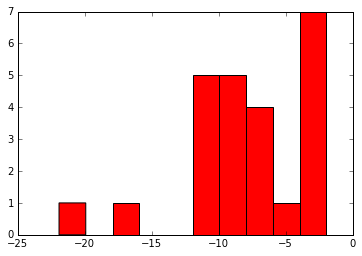

In [147]:
plt.hist(
    x=dataDifference, 
    normed=False, 
    range=(min(dataDifference), max(dataDifference)),
    bins=10,
    label='Time to name',
    color='Red'
)

From analyzing the histograms of both the _Congruent_ and _Incongruent_ datasets we can visualy see that the _Incongruent_ dataset contains a greater number of higher _time-to-name_ values than the _Congruent_ datasets.

This is evident from looking at the values of the mean values of both datasets, previously calculated (14.051125 and 22.0159166667 for _Congruent_ and _Incongruent_ datasets, respectively)

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [159]:
degreesOfFreedom = len(initialData[CONGRUENT]) - 1

def standardError(standardDeviation, sampleSize):
    return standardDeviation / math.sqrt(sampleSize)

def getTValue(mean, se):
    return mean / se

se = standardError(standardDeviation(variance(valuesToPower(valuesMinusMean(dataDifference), 2))), len(dataDifference))
tValue = getTValue(differenceMean, se)

def marginOfError(t, standardError):
    return t * standardError

def getConfidenceInterval(mean, t, standardError):
    return (mean - marginOfError(t, standardError), mean + marginOfError(t, standardError))

print('Degrees of Freedom:', degreesOfFreedom)
print('Standard Error:', se)
print('T Value:', tValue)
print('T Critical Regions: Less than', -TCRITICAL, 'and Greater than', TCRITICAL)
print('Is the T Value inside of the critical region?', tValue >= TCRITICAL or tValue < TCRITICAL)
print('Is p < 0.005?', tValue >= TCRITICAL or tValue < TCRITICAL)
print('Confidence Interval:', getConfidenceInterval(differenceMean, TCRITICAL, se))

Degrees of Freedom: 23
Standard Error: 0.9930286347783406
T Value: -8.02070694411
T Critical Regions: Less than -2.807 and Greater than 2.807
Is the T Value inside of the critical region? True
Is p < 0.005? True
Confidence Interval: (-10.752223044489469, -5.1773602888438637)


Based on the data calculated above, we have that the T Value of the difference of the two conditions (_Congruent_ and _Incongruent_) is inside of the critical region of 99% Confidence.

With this, I **reject** the **HNULL** Hypothesis (**H0**). Since the T Value falls inside of the critical region, it is statistically significant to say that _muCon != muIncon_

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that the reason behind this effect is that the brain already has associated the name of the color with it's visual representation (the actual color). When we are shown the name of a color, but it is in a different color our brain can't process the two at the same time (as the logical and the creative side of our brain are each giving a different response as to what we are seeing).

Similar tasks that will have similar results could be a _Spatial_ Stroop Effect (as described in the wikipedia article referenced at the bottom) where show words like _Big_, _Small_, _Up_, _Down_ in different sizes and positions can also trigger this effect.

#### Sources

- Matplot documentation: http://matplotlib.org/api/pyplot_api.html
- T-Table: https://drive.google.com/file/d/0B8LCYo988pznaUs4dDE5dkJrOEk/view?usp=sharing
- More information on the study: https://en.wikipedia.org/wiki/Stroop_effect
- When to use T Score vs Z Score: http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/
- Types of T Tests: http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/
- About Null and Alternative Hypothesis: http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/null-and-alternative-hypotheses/
- What is a hypothesis test?: http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/what-is-a-hypothesis-test/
